# Importing all necessary libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

# Model Selection
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

%matplotlib inline

## Load Data

In [2]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,927eb9ebf03748be39637284224d811e,9,180,1,9,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
1,fa52d2f82686287d972dc353b0fdbd15,12,180,1,9,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
2,4eb5e4a52518f4c70d97f3a47526f558,15,180,1,10,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
3,96e6e2dda69b2814152c5d400c61cafb,16,180,1,10,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
4,294617661a240f71662ebe0e35aa7559,172,271,1,44,0,0,0,0,Yes,...,0,0,0,0,0,0,0,2,0,No


## Get a brief summary for our PDF dataset.

In [3]:

df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MD5                      30828 non-null  object
 1   pdfsize                  30828 non-null  int64 
 2   metadata size            30828 non-null  int64 
 3   pages                    30828 non-null  int64 
 4   xref length              30828 non-null  int64 
 5   title characters         30828 non-null  int64 
 6   isEncrypted              30828 non-null  int64 
 7   embedded files           30828 non-null  int64 
 8   images                   30828 non-null  int64 
 9   contains text            30828 non-null  object
 10  	header                  30828 non-null  object
 11  obj                      30828 non-null  int64 
 12  endobj                   30828 non-null  int64 
 13  stream                   30828 non-null  int64 
 14  endstream                30828 non-nul

In [4]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(30828, 45)

## Check data types for our dataset

In [5]:

df_pdf.dtypes.value_counts()


int64     41
object     4
Name: count, dtype: int64

In [6]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,JavaScript_Obfuscated,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,...,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000
mean,54.374497,285.149799,2.781562,3781.653432,33.695374,0.003406,0.016933,-0.025010,37.400804,37.988971,...,0.000551,0.005060,0.000616,0.000260,0.000260,0.000843,0.007623,0.000973,2.897982,0.007201
std,279.275407,1125.855897,9.994180,20478.925677,953.271290,0.059365,0.146892,0.156157,189.913299,220.279652,...,0.023477,0.071413,0.024819,0.016107,0.018009,0.029029,0.087350,0.031181,13.271667,0.087571
min,0.000000,4.000000,0.000000,3.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,180.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,15.000000,201.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,298.000000,1.000000,45.000000,7.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,23816.000000,77185.000000,983.000000,263987.000000,76993.000000,1.000000,8.000000,0.000000,22625.000000,22625.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1966.000000,2.000000


## Check total Missing values.

In [7]:

sum(df_pdf.isnull().sum())


0

In [8]:
# Check Missing values for each column
df_pdf.isnull().sum()

MD5                        0
pdfsize                    0
metadata size              0
pages                      0
xref length                0
title characters           0
isEncrypted                0
embedded files             0
images                     0
contains text              0
\theader                   0
obj                        0
endobj                     0
stream                     0
endstream                  0
xref                       0
trailer                    0
startxref                  0
pageno                     0
Encrypt                    0
ObjStm                     0
JS                         0
JavaScript                 0
AA                         0
OpenAction                 0
AcroForm                   0
JBIG2Decode                0
RichMedia                  0
Launch                     0
EmbeddedFile               0
XFA                        0
URI                        0
Colors                     0
JS_Obfuscated              0
JavaScript_Obf

In [9]:
# Display Missing values for specific column
df_pdf[df_pdf.Malicious.isnull()]

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious


In [10]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious


## Visualize Bar chart of missing values

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


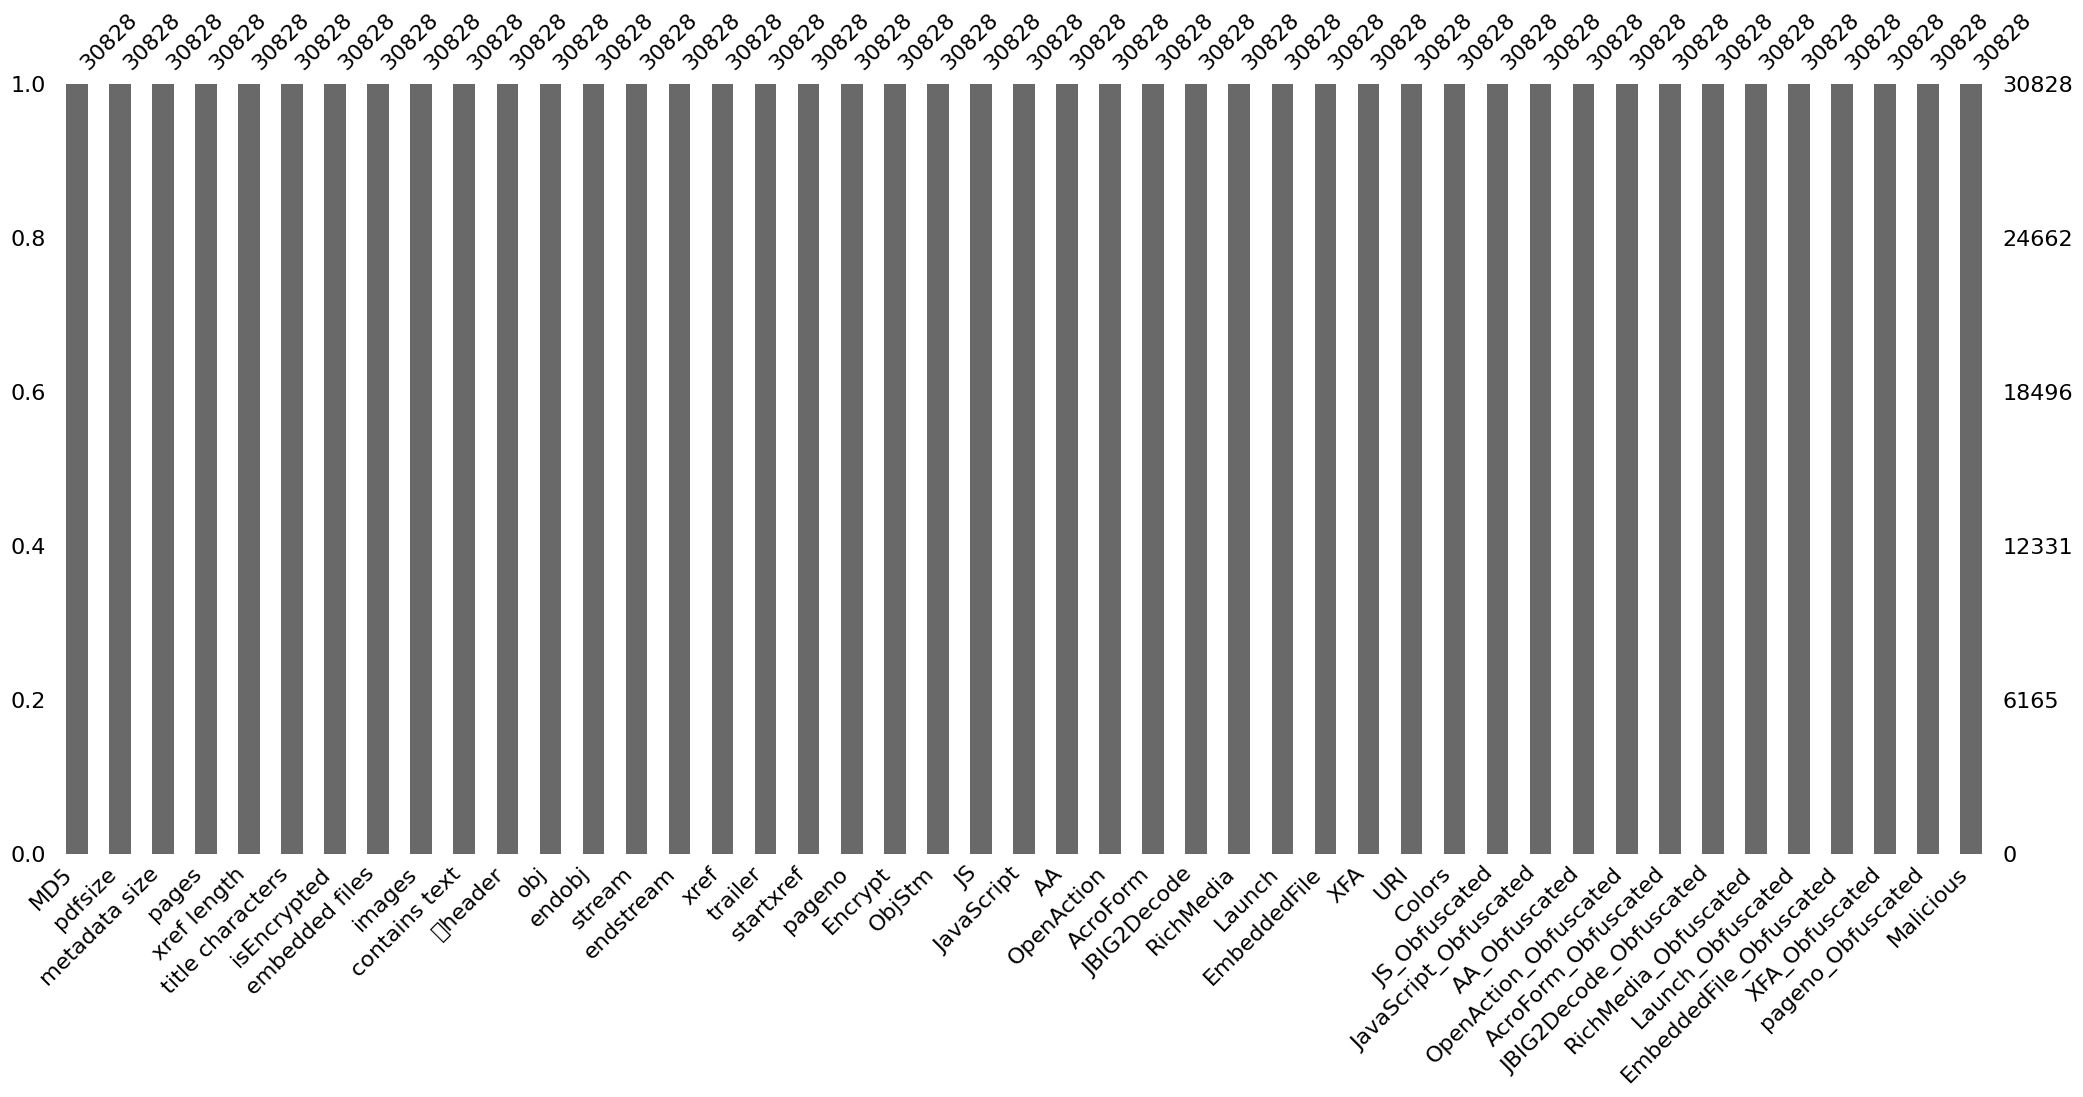

In [11]:

msno.bar(df_pdf);

In [12]:
# store numerical columns to variable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])

In [13]:
# Check missing after applied imputation
df_pdf.isnull().sum()


MD5                        0
pdfsize                    0
metadata size              0
pages                      0
xref length                0
title characters           0
isEncrypted                0
embedded files             0
images                     0
contains text              0
\theader                   0
obj                        0
endobj                     0
stream                     0
endstream                  0
xref                       0
trailer                    0
startxref                  0
pageno                     0
Encrypt                    0
ObjStm                     0
JS                         0
JavaScript                 0
AA                         0
OpenAction                 0
AcroForm                   0
JBIG2Decode                0
RichMedia                  0
Launch                     0
EmbeddedFile               0
XFA                        0
URI                        0
Colors                     0
JS_Obfuscated              0
JavaScript_Obf

In [14]:
sum(df_pdf.isnull().sum())

0

In [15]:
# Drop Fine Name for now..
df_pdf.drop('MD5', axis = 1, inplace= True)

# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())

Number of unique values for *contains text* 3
Number of unique values for *	header* 9
Number of unique values for *Malicious* 2


In [16]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        print(self)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

 # Apply miputation Function
df_pdf[categorical_columns] = DataFrameImputer().fit_transform(df_pdf[categorical_columns])

In [17]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pdfsize                  30828 non-null  float64
 1   metadata size            30828 non-null  float64
 2   pages                    30828 non-null  float64
 3   xref length              30828 non-null  float64
 4   title characters         30828 non-null  float64
 5   isEncrypted              30828 non-null  float64
 6   embedded files           30828 non-null  float64
 7   images                   30828 non-null  float64
 8   contains text            30828 non-null  object 
 9   	header                  30828 non-null  object 
 10  obj                      30828 non-null  float64
 11  endobj                   30828 non-null  float64
 12  stream                   30828 non-null  float64
 13  endstream                30828 non-null  float64
 14  xref                  

In [18]:
# Check duplicate points in our dataset
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(21518)

In [19]:
# Check number of samples for each class [Benign, Malicious]
df_pdf.Malicious.value_counts()


Malicious
Yes    21721
No      9107
Name: count, dtype: int64

In [20]:
data = df_pdf.copy()
data.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,No,\tMalformed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,Yes,\t%PDF-1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No


## Dropping Obfuscated Columns

In [21]:
data = data.drop(columns=[col for col in data.columns if col.endswith('_Obfuscated')])
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,No,\tMalformed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Yes
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,No,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,Yes,\t%PDF-1.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


## result and text mapping

In [22]:
data["contains text"].unique()

array(['No', 'Yes', 'unclear'], dtype=object)

In [23]:
# Assuming df_pdf is your DataFrame
data.iloc[:, 32] = data.iloc[:, 32].map({'Yes': 1, 'No': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,\tMalformed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,\t%PDF-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,1,\t%PDF-1.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Converting header values (text to float)

In [24]:
data["\theader"].unique()

array(['\t%PDF-1.3', '\tMalformed', '\t%PDF-1.6', '\t%PDF-1.7',
       '\t%PDF-1.0', '\t%PDF-1.4', '\t%PDF-1.5', '\t%PDF-1.1',
       '\t%PDF-1.2'], dtype=object)

In [25]:
original_values = np.array(['\t%PDF-1.0','\t%PDF-1.1','\t%PDF-1.2','\t%PDF-1.3','\t%PDF-1.4','\t%PDF-1.5','\t%PDF-1.6','\t%PDF-1.7','\tMalformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)

In [26]:
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,1,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Converting objects to numeric values

In [27]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,\theader,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,1,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           30828 non-null  float64
 1   metadata size     30828 non-null  float64
 2   pages             30828 non-null  float64
 3   xref length       30828 non-null  float64
 4   title characters  30828 non-null  float64
 5   isEncrypted       30828 non-null  float64
 6   embedded files    30828 non-null  float64
 7   images            30828 non-null  float64
 8   contains text     30828 non-null  int64  
 9   	header           30828 non-null  int64  
 10  obj               30828 non-null  float64
 11  endobj            30828 non-null  float64
 12  stream            30828 non-null  float64
 13  endstream         30828 non-null  float64
 14  xref              30828 non-null  float64
 15  trailer           30828 non-null  float64
 16  startxref         30828 non-null  float6

## Dropping column 1 (index 0), column 5 (index 4), and keeping necessary columns

In [29]:

X = data.drop(columns=[ data.columns[32]])  # Adjusted indices
y = data.iloc[:, 32]
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           30828 non-null  float64
 1   metadata size     30828 non-null  float64
 2   pages             30828 non-null  float64
 3   xref length       30828 non-null  float64
 4   title characters  30828 non-null  float64
 5   isEncrypted       30828 non-null  float64
 6   embedded files    30828 non-null  float64
 7   images            30828 non-null  float64
 8   contains text     30828 non-null  int64  
 9   	header           30828 non-null  int64  
 10  obj               30828 non-null  float64
 11  endobj            30828 non-null  float64
 12  stream            30828 non-null  float64
 13  endstream         30828 non-null  float64
 14  xref              30828 non-null  float64
 15  trailer           30828 non-null  float64
 16  startxref         30828 non-null  float6

In [30]:
# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Apply LazyPredict

In [31]:
# from lazypredict.Supervised import LazyClassifier

# # For classification problems 
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models_train, predictions_train = clf.fit(X_train, X_test, y_train, y_test)

# # Display top 3 models
# print("Top 3 models:")
# print(models_train.head(3))

# Random Forest Classifier

In [32]:
# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Calculate and print accuracy score
accuracy = rf_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9971


# Apply Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define the hyperparameters to optimize
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    
    # Create and train model
    rf = RandomForestClassifier(**rf_params, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    
    # Return mean accuracy
    return np.mean(scores)

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get best parameters
best_params = study.best_params
best_score = study.best_value

# Create final model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-24 15:03:48,601] A new study created in memory with name: no-name-37f3442e-c54e-4bec-956b-3f0624b2a7a4
[I 2024-10-24 15:03:52,585] Trial 0 finished with value: 0.9743738982500639 and parameters: {'n_estimators': 130, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9743738982500639.
[I 2024-10-24 15:03:56,891] Trial 1 finished with value: 0.997177910204799 and parameters: {'n_estimators': 71, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.997177910204799.
[I 2024-10-24 15:04:00,672] Trial 2 finished with value: 0.979369338014841

In [34]:
print(best_params)
print(best_score)

{'n_estimators': 156, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}
0.9975022853789153


# Random Forest after Hyperparameter Tuning

In [35]:
best_rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_rf.predict(X_test)

# Calculate and print accuracy score
accuracy = best_rf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9964


# XGB Classifier

In [36]:
from xgboost import XGBClassifier

# Initialize the model
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on test set
y_pred = xgb.predict(X_test)

# Get accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9969


# Apply Optuna

In [37]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }
    
    # Create and train model
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get best parameters and score
print('Best trial:')
print('  Value: ', study.best_trial.value)
print('  Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')

# Train final model with best parameters
best_xgb = XGBClassifier(**study.best_trial.params)
best_xgb.fit(X_train, y_train)

[I 2024-10-24 14:47:38,223] A new study created in memory with name: no-name-a5465429-6973-44f1-807b-2c12ae1ae2f9
[I 2024-10-24 14:47:38,365] Trial 0 finished with value: 0.9925397340253 and parameters: {'max_depth': 3, 'learning_rate': 0.03146411188071791, 'n_estimators': 161, 'min_child_weight': 4, 'subsample': 0.600281782390121, 'colsample_bytree': 0.9771648313246415}. Best is trial 0 with value: 0.9925397340253.
[I 2024-10-24 14:47:38,603] Trial 1 finished with value: 0.9970807654881609 and parameters: {'max_depth': 3, 'learning_rate': 0.09713565225467956, 'n_estimators': 296, 'min_child_weight': 1, 'subsample': 0.8429712529836443, 'colsample_bytree': 0.8191815607732361}. Best is trial 1 with value: 0.9970807654881609.
[I 2024-10-24 14:47:38,842] Trial 2 finished with value: 0.9956211482322413 and parameters: {'max_depth': 4, 'learning_rate': 0.05578583191814455, 'n_estimators': 259, 'min_child_weight': 7, 'subsample': 0.7272194600382483, 'colsample_bytree': 0.692853316855665}. Bes

Best trial:
  Value:  0.9975673045734674
  Params: 
    max_depth: 6
    learning_rate: 0.18370759390427235
    n_estimators: 293
    min_child_weight: 2
    subsample: 0.9622732556929086
    colsample_bytree: 0.6469695671873834


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6469695671873834, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18370759390427235,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=293, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# XGB after Hyperparameter Tuning

In [38]:
# Train the model
best_xgb.fit(X_train, y_train)

# Make predictions on test set
y_pred = best_xgb.predict(X_test)

# Get accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9976


# Extra Trees Classifier

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the model
etc = ExtraTreesClassifier(random_state=42)

# Train the model
etc.fit(X_train, y_train)

# Make predictions
y_pred = etc.predict(X_test)

# Calculate accuracy
accuracy = etc.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9971


# Apply Optuna

In [40]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }
    
    # Create and train model
    model = ExtraTreesClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get best parameters and score
print('Best parameters:', study.best_params)
print('Best accuracy:', study.best_value)

# Train final model with best parameters
best_model = ExtraTreesClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, y_train)

[I 2024-10-24 14:48:04,429] A new study created in memory with name: no-name-ba21f8eb-130b-47b9-961b-15b36037754c
[I 2024-10-24 14:48:04,748] Trial 0 finished with value: 0.7156989944858904 and parameters: {'n_estimators': 114, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7156989944858904.
[I 2024-10-24 14:48:04,842] Trial 1 finished with value: 0.719104768083036 and parameters: {'n_estimators': 29, 'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.719104768083036.
[I 2024-10-24 14:48:05,022] Trial 2 finished with value: 0.9930262731106065 and parameters: {'n_estimators': 17, 'max_depth': 21, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9930262731106065.
[I 2024-10-24 14:48:05,671] Trial 3 finished with value: 0.9323710671423938 and parameters: {'n_estimators': 87, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.

Best parameters: {'n_estimators': 79, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 1}
Best accuracy: 0.9969185857930587


ExtraTreesClassifier(max_depth=25, min_samples_split=3, n_estimators=79,
                     random_state=42)

# Extra Trees Classifier after Hyperparameter Tuning

In [41]:
# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9969


# RF, ETC and XGB as Base Learners

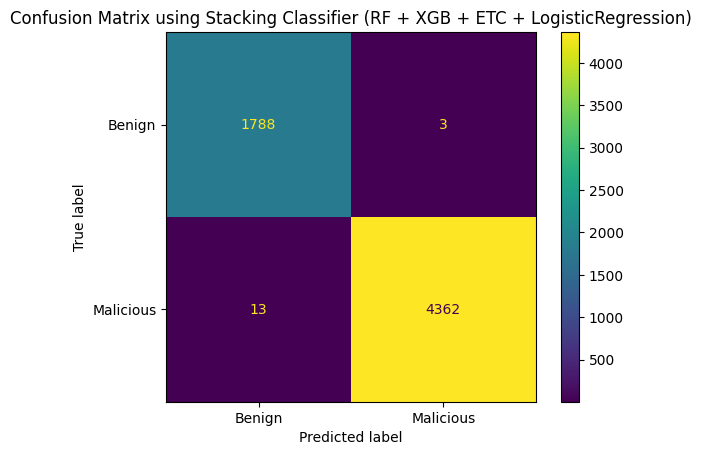

False Positive Rate: 0.0016750418760469012
True Positive Rate: 0.9970285714285714
Accuracy Score: 0.9974051248783652


In [42]:
logistic_meta = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(
    estimators=[
        ('rf', best_rf),  # Random Forest base model
        ('xgb', best_xgb),  # XGB base model
        ('etc', best_model)  # ETC base model
    ],
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + XGB + ETC + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')
